<a href="https://colab.research.google.com/github/buobizarro/Clases/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de la red neuronal que resuelve la ecuacion dinamica de un grado de libertad.

## Planteamiento

# Sistema Dinámico de Un Grado de Libertad (SDOF)

La ecuación diferencial que describe un sistema dinámico de un grado de libertad (SDOF) es:

$m \ddot{y}(t) + c \dot{y}(t) + k y(t) = P(t)$,

donde:

- $m$: masa del sistema.  
- $c$: coeficiente de amortiguamiento.  
- $k$: rigidez del sistema.  
- $P(t)$: fuerza externa aplicada al sistema (si existe).  
- $y(t)$: desplazamiento del sistema en función del tiempo.  

---

## Casos Particulares

### 1. Vibración Libre Sin Amortiguamiento ($c = 0, P(t) = 0$):

$m \ddot{y}(t) + k y(t) = 0.$

La solución general es:

$y(t) = y_0 \cos(\omega_n t) + \frac{\dot{y}_0}{\omega_n} \sin(\omega_n t)$,

donde:

$\omega_n = \sqrt{\frac{k}{m}}$

es la frecuencia natural.

---

### 2. Vibración Libre Con Amortiguamiento ($P(t) = 0$):

$m \ddot{y}(t) + c \dot{y}(t) + k y(t) = 0.$

La solución depende del factor de amortiguamiento crítico:

$\zeta = \frac{c}{2 \sqrt{k m}}.$

#### a. Subamortiguado ($\zeta < 1$):

$y(t) = e^{-\zeta \omega_n t} \left( y_0 \cos(\omega_d t) + \frac{\dot{y}_0 + \zeta \omega_n y_0}{\omega_d} \sin(\omega_d t) \right),$

donde:

$\omega_d = \omega_n \sqrt{1 - \zeta^2}.$

#### b. Críticamente amortiguado ($\zeta = 1$) y Sobreamortiguado ($\zeta > 1$):

Las soluciones en estos casos son más complejas y no se incluyen aquí.

---

### 3. Con Fuerza Externa ($P(t) \neq 0$):

La solución incluye la combinación de:

1. **Solución homogénea**: Como en los casos anteriores.  
2. **Solución particular**: Depende de $P(t)$.

---

## Ejemplo Práctico

En este modelo, usaremos el caso **subamortiguado** ($\zeta < 1$) con $P(t) = 0$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
def generate_data(num_samples):
    data = []
    labels = []
    for _ in range(num_samples):
        m = np.random.uniform(1, 10)  # Masa
        k = np.random.uniform(10, 100)  # Rigidez
        c = np.random.uniform(0, 10)  # Amortiguamiento
        y0 = np.random.uniform(-5, 5)  # Desplazamiento inicial
        v0 = np.random.uniform(-5, 5)  # Velocidad inicial
        t = np.linspace(0, 10, 100)  # Tiempo


        omega_n = np.sqrt(k / m)
        zeta = c / (2 * np.sqrt(k * m))
        omega_d = omega_n * np.sqrt(1 - zeta**2) if zeta < 1 else 0


        if zeta < 1:
            y = np.exp(-zeta * omega_n * t) * (
                y0 * np.cos(omega_d * t) +
                (v0 + zeta * omega_n * y0) / omega_d * np.sin(omega_d * t)
            )
        else:
            y = np.zeros_like(t)

        data.append([m, c, k, y0, v0])
        labels.append(y)

    return np.array(data), np.array(labels)


In [ ]:
num_samples = 10000
data, labels = generate_data(num_samples)

train_data = data[:8000]
train_labels = labels[:8000]
val_data = data[8000:]
val_labels = labels[8000:]


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(128, activation='relu'),
    Dense(100)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2987 - mae: 0.8784 - val_loss: 0.5828 - val_mae: 0.4506
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5283 - mae: 0.4303 - val_loss: 0.4788 - val_mae: 0.3948
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4312 - mae: 0.3756 - val_loss: 0.4264 - val_mae: 0.3671
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4041 - mae: 0.3567 - val_loss: 0.3931 - val_mae: 0.3475
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3776 - mae: 0.3423 - val_loss: 0.3694 - val_mae: 0.3361
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3450 - mae: 0.3239 - val_loss: 0.3410 - val_mae: 0.3150
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3135 - mae: 0.3078 - val_loss: 0.3282 - val_mae: 0.3096
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3167 - mae: 0.3081 - val_loss: 0.3217 - val_mae: 0.3130
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
test_data, test_labels = generate_data(1000)
loss, mae = model.evaluate(test_data, test_labels)
print(f"Mean Absolute Error: {mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1198 - mae: 0.1801 
Mean Absolute Error: 0.18882811069488525


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


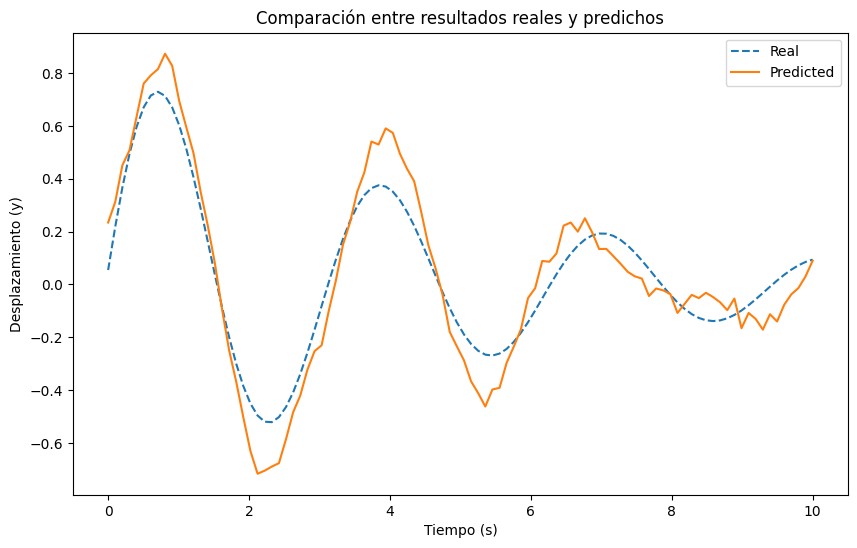

In [ ]:
sample_data, sample_label = test_data[0], test_labels[0]
predicted_label = model.predict(sample_data.reshape(1, -1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 10, 100), sample_label, label='Real', linestyle='--')
plt.plot(np.linspace(0, 10, 100), predicted_label, label='Predicted')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (y)')
plt.title('Comparación entre resultados reales y predichos')
plt.legend()
plt.show()

In [ ]:
model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(val_data, val_labels))


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1314 - mae: 0.1938 - val_loss: 0.1443 - val_mae: 0.2046
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1229 - mae: 0.1876 - val_loss: 0.1471 - val_mae: 0.2038
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1372 - mae: 0.1966 - val_loss: 0.1475 - val_mae: 0.2067
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1283 - mae: 0.1904 - val_loss: 0.1412 - val_mae: 0.1931
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1167 - mae: 0.1822 - val_loss: 0.1408 - val_mae: 0.1945
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1150 - mae: 0.1816 - val_loss: 0.1303 - val_mae: 0.1832
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1221 - mae: 0.1860 - val_loss: 0.1347 - val_mae: 0.1913
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1182 - mae: 0.1829 - val_loss: 0.1286 - val_mae: 0.1847
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [ ]:
model.fit(data, labels, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0720 - mae: 0.1447 - val_loss: 0.1036 - val_mae: 0.1778
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0705 - mae: 0.1471 - val_loss: 0.0914 - val_mae: 0.1662
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0792 - mae: 0.1504 - val_loss: 0.0868 - val_mae: 0.1600
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0801 - mae: 0.1528 - val_loss: 0.0868 - val_mae: 0.1626
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0735 - mae: 0.1487 - val_loss: 0.0783 - val_mae: 0.1466
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0657 - mae: 0.1390 - val_loss: 0.0897 - val_mae: 0.1605
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0677 - mae: 0.1443 - val_loss: 0.0809 - val_mae: 0.1504
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0736 - mae: 0.1501 - val_loss: 0.0792 - val_mae: 0.1457
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
from tensorflow.keras.regularizers import l2


model = Sequential([
    Dense(64, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(100)
])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(scaled_data, labels, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8630 - mae: 0.5083 - val_loss: 0.5658 - val_mae: 0.3938
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5139 - mae: 0.3742 - val_loss: 0.4960 - val_mae: 0.3654
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4691 - mae: 0.3512 - val_loss: 0.4594 - val_mae: 0.3388
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4448 - mae: 0.3371 - val_loss: 0.4408 - val_mae: 0.3287
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4154 - mae: 0.3171 - val_loss: 0.4218 - val_mae: 0.3139
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4267 - mae: 0.3172 - val_loss: 0.4085 - val_mae: 0.3044
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3989 - mae: 0.3062 - val_loss: 0.3964 - val_mae: 0.2955
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3789 - mae: 0.2942 - val_loss: 0.3869 - val_mae: 0.2909
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
test_data, test_labels = generate_data(1000)
scaled_test_data = scaler.transform(test_data)
loss, mae = model.evaluate(scaled_test_data, test_labels)
print(f"Mean Absolute Error (MAE) en los datos de prueba: {mae}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2273 - mae: 0.1949
Mean Absolute Error (MAE) en los datos de prueba: 0.20537859201431274


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.5630 - mae: 2.7986 
Mean Absolute Error (Mejorado): 2.7616443634033203
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


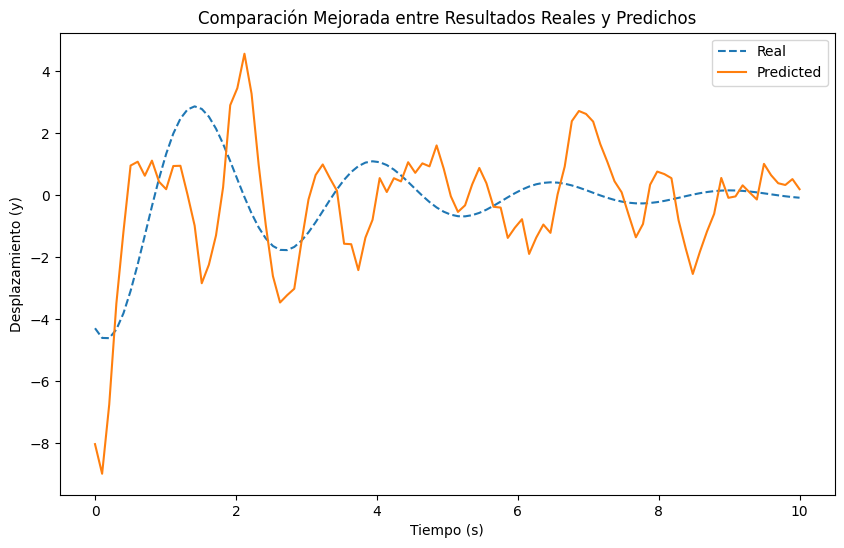

In [ ]:
loss, mae = model.evaluate(test_data, test_labels)
print(f"Mean Absolute Error (Mejorado): {mae}")

sample_data, sample_label = test_data[0], test_labels[0]
predicted_label = model.predict(sample_data.reshape(1, -1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 10, 100), sample_label, label='Real', linestyle='--')
plt.plot(np.linspace(0, 10, 100), predicted_label, label='Predicted')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (y)')
plt.title('Comparación Mejorada entre Resultados Reales y Predichos')
plt.legend()
plt.show()


In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(5,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(scaled_data, labels, epochs=100, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6669 - mae: 0.4695 - val_loss: 0.4032 - val_mae: 0.3426
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3731 - mae: 0.3352 - val_loss: 0.3342 - val_mae: 0.3087
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3074 - mae: 0.2927 - val_loss: 0.2832 - val_mae: 0.2723
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2569 - mae: 0.2584 - val_loss: 0.2424 - val_mae: 0.2480
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2248 - mae: 0.2370 - val_loss: 0.2199 - val_mae: 0.2311
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2044 - mae: 0.2235 - val_loss: 0.1939 - val_mae: 0.2127
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1896 - mae: 0.2137 - val_loss: 0.1836 - val_mae: 0.2083
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1830 - mae: 0.2074 - val_loss: 0.1684 - val_mae: 0.2004
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/

In [ ]:
num_samples = 50000
data, labels = generate_data(num_samples)
scaled_data = scaler.fit_transform(data)
model.fit(scaled_data, labels, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0502 - mae: 0.1094 - val_loss: 0.0314 - val_mae: 0.0867
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0340 - mae: 0.0912 - val_loss: 0.0267 - val_mae: 0.0793
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0300 - mae: 0.0853 - val_loss: 0.0299 - val_mae: 0.0861
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0299 - mae: 0.0839 - val_loss: 0.0308 - val_mae: 0.0893
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0295 - mae: 0.0853 - val_loss: 0.0249 - val_mae: 0.0800
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0272 - mae: 0.0805 - val_loss: 0.0273 - val_mae: 0.0844
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0266 - mae: 0.0809 - val_loss: 0.0262 - val_mae: 0.0820
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0283 - mae: 0.0818 - val_loss: 0.0276 - val_mae: 0.0841
Epoch 9/100
1250/1250 ━━━━━━━━━━

In [ ]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Dense(128, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(100)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(scaled_data, labels, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.2124 - mae: 0.4751 - val_loss: 0.6178 - val_mae: 0.4067
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6301 - mae: 0.4131 - val_loss: 0.5998 - val_mae: 0.4060
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6073 - mae: 0.4078 - val_loss: 0.5881 - val_mae: 0.4007
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6046 - mae: 0.4082 - val_loss: 0.5814 - val_mae: 0.3999
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6134 - mae: 0.4121 - val_loss: 0.5750 - val_mae: 0.3952
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5942 - mae: 0.4060 - val_loss: 0.5754 - val_mae: 0.4019
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5925 - mae: 0.4052 - val_loss: 0.5649 - val_mae: 0.3933
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5666 - mae: 0.3879 - val_loss: 0.5334 - val_mae: 0.3657
Epoch 9/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


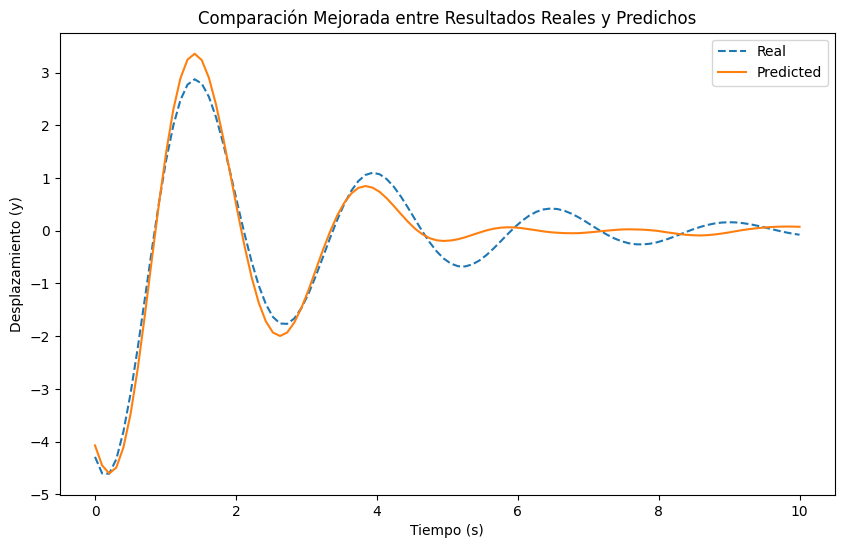

In [ ]:
sample_data, sample_label = test_data[0], test_labels[0]
scaled_sample_data = scaler.transform(sample_data.reshape(1, -1))
predicted_label = model.predict(scaled_sample_data).flatten()

t = np.linspace(0, 10, 100)
plt.figure(figsize=(10, 6))
plt.plot(t, sample_label, label='Real', linestyle='--')
plt.plot(t, predicted_label, label='Predicted')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (y)')
plt.title('Comparación Mejorada entre Resultados Reales y Predichos')
plt.legend()
plt.show()
